In [101]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

## Stochastic Training

In [102]:
sess = tf.Session()

In [103]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10, 100)

print(f"{x_vals} \n\n\n {y_vals}")

[0.85262768 0.88167145 0.99445685 1.05137431 0.90771676 0.91995774
 1.14109902 1.03899296 1.00233132 1.13587767 1.0838863  0.86758031
 0.9692499  1.04441274 0.84454501 0.99914171 0.85841952 1.00887461
 0.96971001 1.1614556  1.04798028 0.98198129 0.91311325 0.91243881
 0.92936964 1.02317447 0.84519766 0.82465338 0.99829788 0.89103206
 0.80926742 0.98030967 0.85888595 1.11005345 1.20184816 1.20073016
 0.96526202 1.16326599 0.94558679 1.02068371 0.85260811 0.89835098
 1.13160795 0.8009209  0.9336862  0.92089028 1.06891666 0.99413041
 0.87977856 1.27400341 1.08381898 1.25126248 1.11523621 0.99130929
 0.89788344 1.00218918 1.07286407 0.98297773 0.99982325 1.11823235
 0.96429342 1.21608488 0.99188825 0.96478594 1.05488851 1.04765193
 1.06706657 0.99538958 0.79805853 1.13222605 1.01848997 0.9393722
 1.0201721  0.99939698 0.82112176 1.07320904 0.98496223 1.03178751
 0.83598558 1.00602751 0.95062738 0.73209187 1.05739404 0.86088665
 1.03167664 1.02210511 0.91555065 0.77824106 0.88234866 1.08349

In [104]:
x_data = tf.placeholder(shape=[1], dtype=tf.float32)
y_target = tf.placeholder(shape=[1], dtype=tf.float32)

print(f"{x_data} \n\n{y_target}")

Tensor("Placeholder:0", shape=(1,), dtype=float32) 

Tensor("Placeholder_1:0", shape=(1,), dtype=float32)


In [105]:
A = tf.Variable(tf.random_normal(shape = [1]))
A

<tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>

In [106]:
output = tf.multiply(x_data, A)
output

<tf.Tensor 'Mul:0' shape=(1,) dtype=float32>

In [107]:
loss = tf.square(output - y_target)
loss

<tf.Tensor 'Square:0' shape=(1,) dtype=float32>

In [108]:
optimizer = tf.train.GradientDescentOptimizer(0.02)
train_step = optimizer.minimize(loss)

print(f"{optimizer} \n\n{train_step}")


name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable/ApplyGradientDescent"



In [109]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [110]:
loss_stochastic = []
for i in range(1100):
    rand_index = np.random.choice(100)
    rand_x = [x_vals[rand_index]]
    rand_y = [y_vals[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1) % 5 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(
            loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_stochastic.append(temp_loss)

Step #5 A = [1.1362834]
Loss = [78.67717]
Step #10 A = [2.7532492]
Loss = [57.343346]
Step #15 A = [4.045195]
Loss = [37.17649]
Step #20 A = [5.109506]
Loss = [19.90834]
Step #25 A = [6.0106063]
Loss = [15.803658]
Step #30 A = [6.71966]
Loss = [19.8792]
Step #35 A = [7.310409]
Loss = [11.806816]
Step #40 A = [7.828473]
Loss = [1.2914011]
Step #45 A = [8.206212]
Loss = [9.421737]
Step #50 A = [8.615001]
Loss = [10.860011]
Step #55 A = [8.890573]
Loss = [5.855558]
Step #60 A = [9.151961]
Loss = [0.0548722]
Step #65 A = [9.280429]
Loss = [0.12794885]
Step #70 A = [9.375794]
Loss = [0.49036428]
Step #75 A = [9.402639]
Loss = [0.00660376]
Step #80 A = [9.611831]
Loss = [3.257575]
Step #85 A = [9.760586]
Loss = [0.2862922]
Step #90 A = [9.775428]
Loss = [0.81344306]
Step #95 A = [9.750672]
Loss = [0.81634426]
Step #100 A = [9.943249]
Loss = [1.5210835]
Step #105 A = [10.133821]
Loss = [0.89017344]
Step #110 A = [10.186675]
Loss = [0.00963254]
Step #115 A = [10.047805]
Loss = [1.8771244]
Step

Step #990 A = [9.946629]
Loss = [0.02772228]
Step #995 A = [10.012811]
Loss = [0.04613489]
Step #1000 A = [10.070833]
Loss = [0.00015015]
Step #1005 A = [10.084686]
Loss = [1.4269259]
Step #1010 A = [10.131595]
Loss = [0.1342411]
Step #1015 A = [10.13048]
Loss = [0.660336]
Step #1020 A = [10.15955]
Loss = [0.48778725]
Step #1025 A = [10.065473]
Loss = [2.5135252]
Step #1030 A = [10.048812]
Loss = [0.3913179]
Step #1035 A = [10.0490675]
Loss = [0.31959966]
Step #1040 A = [10.13398]
Loss = [0.42850885]
Step #1045 A = [10.115952]
Loss = [0.6353761]
Step #1050 A = [10.212216]
Loss = [0.28698045]
Step #1055 A = [10.142406]
Loss = [2.2007651]
Step #1060 A = [10.24066]
Loss = [2.0185432]
Step #1065 A = [10.308953]
Loss = [0.13527386]
Step #1070 A = [10.240759]
Loss = [0.53599066]
Step #1075 A = [10.2461405]
Loss = [2.5175245]
Step #1080 A = [10.178052]
Loss = [3.524328]
Step #1085 A = [9.942353]
Loss = [0.00556064]
Step #1090 A = [9.9898815]
Loss = [0.43896616]
Step #1095 A = [10.026724]
Loss

## Batch Training

In [111]:
ops.reset_default_graph()

In [112]:
sess = tf.Session()

In [113]:
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10, 100)

print(f"{x_vals} \n\n {y_vals}")

[1.04386483 0.94751924 0.92763887 0.94813709 1.04983703 0.79512709
 1.11567955 0.86773087 0.86826927 1.12356358 0.93954345 0.99347286
 0.93960077 0.97137462 0.95190196 1.08333352 1.01035158 1.0747164
 0.9351515  1.09037459 1.00210633 1.08655754 0.82402943 1.03139664
 0.97195011 0.88920104 0.98137286 0.98371609 1.0360076  0.98493076
 1.05741915 1.00036225 1.07166695 0.91819928 0.86451379 1.05663256
 1.06768349 0.92545012 1.01048305 1.04211152 0.95961206 1.07872772
 0.98199248 0.9588467  0.98556324 0.9880849  0.93128    1.13090664
 1.08580759 0.98230958 0.96554591 0.94855308 1.06529747 1.03866705
 1.03981426 1.04494373 1.10222344 0.97539393 0.99074363 0.90126121
 1.01146989 0.90793201 0.96635971 0.91917036 1.15400947 0.85999583
 1.21024682 1.18345221 0.960235   1.16886175 1.0866977  1.00805381
 0.82706284 1.01090301 1.03967965 1.02073807 1.09798786 0.99365289
 0.88416934 0.93960152 1.04143492 1.17787027 0.865344   1.03437384
 0.82907125 0.95261161 1.17753491 0.93897254 0.96034173 0.95960

In [114]:
x_data = tf.placeholder(dtype=tf.float32, shape=(None, 1))
y_target = tf.placeholder(dtype=tf.float32, shape=(None, 1))

print(f"{x_data} \n\n{y_target}")

Tensor("Placeholder:0", shape=(?, 1), dtype=float32) 

Tensor("Placeholder_1:0", shape=(?, 1), dtype=float32)


In [115]:
batch_size = 20

In [116]:
A = tf.Variable(tf.random_normal(shape=[1, 1]))
A

<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32_ref>

In [117]:
output = tf.matmul(x_data, A)
output

<tf.Tensor 'MatMul:0' shape=(?, 1) dtype=float32>

In [118]:
loss = tf.reduce_mean(tf.square(output - y_target))
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [119]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [120]:
optimizer = tf.train.GradientDescentOptimizer(0.02)
train_step = optimizer.minimize(loss)

print(f"{optimizer} \n\n{train_step}")


name: "GradientDescent"
op: "NoOp"
input: "^GradientDescent/update_Variable/ApplyGradientDescent"



In [121]:
loss_batch = []
for i in range(1100):
    rand_index = np.random.choice(100, size = batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target : rand_y})
    if (i+1)%5==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
        print('Loss = ' + str(temp_loss))
        loss_batch.append(temp_loss)

Step #5 A = [[1.9762037]]
Loss = 65.04704
Step #10 A = [[3.447663]]
Loss = 42.83485
Step #15 A = [[4.6483803]]
Loss = 29.2382
Step #20 A = [[5.6298723]]
Loss = 19.21988
Step #25 A = [[6.427499]]
Loss = 12.641296
Step #30 A = [[7.0709076]]
Loss = 7.8702865
Step #35 A = [[7.5960264]]
Loss = 5.804594
Step #40 A = [[8.040681]]
Loss = 4.952919
Step #45 A = [[8.38126]]
Loss = 3.1836345
Step #50 A = [[8.664085]]
Loss = 1.9512146
Step #55 A = [[8.904412]]
Loss = 1.782226
Step #60 A = [[9.117384]]
Loss = 2.2044964
Step #65 A = [[9.291586]]
Loss = 1.7807995
Step #70 A = [[9.389276]]
Loss = 0.83126295
Step #75 A = [[9.492998]]
Loss = 0.84304935
Step #80 A = [[9.564001]]
Loss = 1.0761534
Step #85 A = [[9.636509]]
Loss = 0.7534602
Step #90 A = [[9.707773]]
Loss = 0.5740959
Step #95 A = [[9.750773]]
Loss = 0.7016996
Step #100 A = [[9.774003]]
Loss = 0.7104515
Step #105 A = [[9.810991]]
Loss = 0.8631689
Step #110 A = [[9.826466]]
Loss = 0.3982454
Step #115 A = [[9.852684]]
Loss = 0.72056687
Step #120

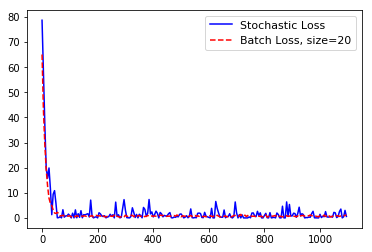

In [122]:
plt.plot(range(0, 1100, 5), loss_stochastic, 'b-', label='Stochastic Loss')
plt.plot(range(0, 1100, 5), loss_batch, 'r--', label='Batch Loss, size=20')
plt.legend(loc='upper right', prop={'size': 11})
plt.show()